In [1]:
import pandas as pd
import os
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
def convert_rgb_gray_level(img):
    m =img.shape[0]
    n =img.shape[1]
    im_1 = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_1[i,j]=get_distance(img[i,j,:])
    return im_1
def get_distance(v, w=[1/3,1/3,1/3]):
    a,b,c = v[0], v[1], v[2]
    w1,w2,w3 = w[0], w[1], w[2]
    d = ((a**2)*w1 +
         (b**2)*w2 +
         (c**2)*w3)**.5
    return int(d)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from scipy import sparse
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

In [5]:
signatures = []
target = []
flat_data = []
all_signatures = ["170401025","170401016","170401011", "160401048","160401050"]
for i in all_signatures:
    for sig in os.listdir(i):
        img = convert_rgb_gray_level(plt.imread(i+"/" + sig))
        resized = resize(img, (200,200), anti_aliasing=True, mode='reflect')
        flat_data.append(resized.flatten()) 
        signatures.append(resized)
        target.append(i)
flat_data = np.array(flat_data)
target = np.array(target)

In [6]:
y_dense = LabelBinarizer().fit_transform(target)
#y_sparse = sparse.csr_matrix(y_dense)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    flat_data, y_dense, test_size=0.3,random_state=109)

In [12]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1).fit(X_train, y_train)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs'):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.73      0.84        11
           2       1.00      1.00      1.00         7
           3       1.00      0.78      0.88         9
           4       0.86      0.75      0.80         8

   micro avg       0.95      0.85      0.90        46
   macro avg       0.95      0.85      0.89        46
weighted avg       0.96      0.85      0.89        46
 samples avg       0.84      0.85      0.84        46




/opt/anaconda/2020.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[34,  1],
        [ 0, 11]],

       [[35,  0],
        [ 3,  8]],

       [[39,  0],
        [ 0,  7]],

       [[37,  0],
        [ 2,  7]],

       [[37,  1],
        [ 2,  6]]])

### İmzalar
    [0, 0, 0, 0, 1] = "170401025"
    [0, 0, 0, 1, 0] = "170401016"
    [0, 0, 1, 0, 0] = "170401011"
    [0, 1, 0, 0, 0] = "160401050"
    [1, 0, 0, 0, 0] = "160401048" BENİM İMZAM

array([[1, 0, 0, 0, 0]])

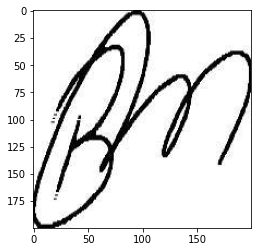

In [18]:
index = 95
y_pred = clf.predict([flat_data[index]])
plt.imshow(signatures[index], cmap="gray")
y_pred

In [20]:
for i in range(91,121):
    pred = clf.predict([flat_data[i]])
    print(i,y_pred[0], pred[0])


91 [1 0 0 0 0] [1 0 0 0 0]
92 [1 0 0 0 0] [1 0 0 0 0]
93 [1 0 0 0 0] [1 0 0 0 0]
94 [1 0 0 0 0] [1 0 0 0 0]
95 [1 0 0 0 0] [1 0 0 0 0]
96 [1 0 0 0 0] [1 0 0 0 0]
97 [1 0 0 0 0] [1 0 0 0 0]
98 [1 0 0 0 0] [1 0 0 0 0]
99 [1 0 0 0 0] [1 0 0 0 0]
100 [1 0 0 0 0] [1 0 0 0 0]
101 [1 0 0 0 0] [1 0 0 0 0]
102 [1 0 0 0 0] [1 0 0 0 0]
103 [1 0 0 0 0] [1 0 0 0 0]
104 [1 0 0 0 0] [1 0 0 0 0]
105 [1 0 0 0 0] [1 0 0 0 0]
106 [1 0 0 0 0] [1 0 0 0 0]
107 [1 0 0 0 0] [1 0 0 0 0]
108 [1 0 0 0 0] [1 0 0 0 0]
109 [1 0 0 0 0] [1 0 0 0 0]
110 [1 0 0 0 0] [1 0 0 0 0]
111 [1 0 0 0 0] [1 0 0 0 0]
112 [1 0 0 0 0] [1 0 0 0 0]
113 [1 0 0 0 0] [1 0 0 0 0]
114 [1 0 0 0 0] [1 0 0 0 0]
115 [1 0 0 0 0] [1 0 0 0 0]
116 [1 0 0 0 0] [1 0 0 0 0]
117 [1 0 0 0 0] [1 0 0 0 0]
118 [1 0 0 0 0] [1 0 0 0 0]
119 [1 0 0 0 0] [1 0 0 0 0]
120 [1 0 0 0 0] [1 0 0 0 0]


## İmza verisi
    Hesaplamalar sonucu görüldüğü üzere model benim imzalarımın tümünü doğru şekilde tahmin edebiliyor.